# Task 2: Load the Data and Libraries

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12,8)

In [5]:
data = pd.read_csv('bike_sharing_data.txt')

In [6]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


#### There is positve correlation between population and Profit in data

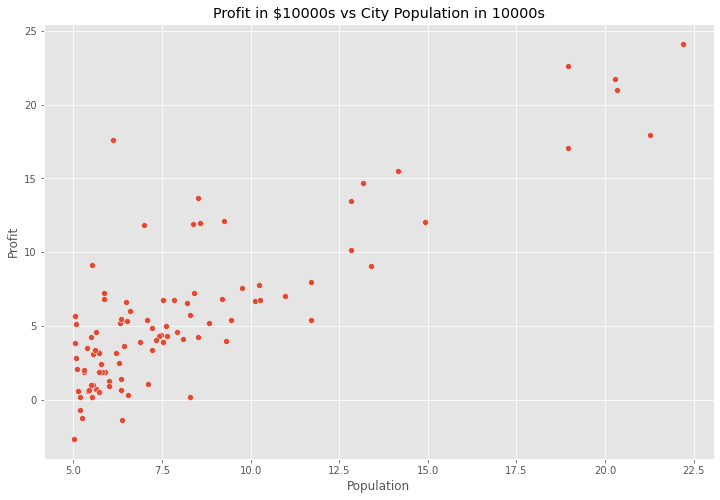

In [11]:
ax= sns.scatterplot(x='Population', y= "Profit", data= data)
ax.set_title("Profit in $10000s vs City Population in 10000s");

# Task 4 : Compute the Cost $J(\theta)$

The objective of linear regression is to minimize the cost function
$$ J(\theta) = \frac{1}{2m} \sum\limits_{i=1}^{m} (h_{\theta}(x^{(i)})-y^{(i)}))^2 $$

where $h_{\theta}$ is the hypothesis and given by the linear model
$$ h_\theta(x) = \theta^T x = \theta_o + \theta_1 x_1 $$

In [17]:
r= np.corrcoef(data.Population, data.Profit)

In [19]:
r[0,1]

0.837873232526341

In [21]:
def cost_function(x,y, theta):
    m= len(y)
    y_pred =x.dot(theta)
    error = (y_pred-y)**2
    return 1/(2*m) * np.sum(error)

In [22]:
m= data.Population.values.size
X = np.append(np.ones((m,1)), data.Population.values.reshape(m,1), axis=1)
y=data.Profit.values.reshape(m,1)
theta= np.zeros((2,1))

cost_function(X,y,theta)

32.072733877455676

In [58]:
X = np.append(np.ones((m,1)), data.Population.values.reshape(m,1), axis=1)

X


array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

# Task 5: Gradient Descent

Minimize the cost fuction $J(\theta)$ by updatin the below equation and repeat until convergence
$$ \theta_j := \theta_j - \alpha (1/m) \sum\limits_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} $$ (simultaneously update $\theta_j$ for all j)

In [23]:
def gradient_descent(X,y, theta, alpha, iterations=10):
    m=len(y)
    costs=[]
    for i in range (iterations):
        y_pred=X.dot(theta)
        error = np.dot(X.transpose(), (y_pred -y))
        
        theta = theta -alpha*(1/m)* error
        costs.append(cost_function(X,y, theta))
        
        
    return theta, costs

In [27]:
theta, costs=gradient_descent(X,y ,theta, alpha=0.01, iterations=2000 )
print("h(x)={} + {}x1".format(str(round(theta[0,0], 3)), str(round(theta[1,0], 3)) ))

h(x)=-3.896 + 1.193x1


In [28]:
from mpl_toolkits.mplot3d import Axes3D

In [31]:
theta_0 = np.linspace(-10,10, 100)
theta_1= np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t= np.array([theta_0[i], theta_1[j]])
        cost_values[i,j]= cost_function(X,y,t)
        
        
        

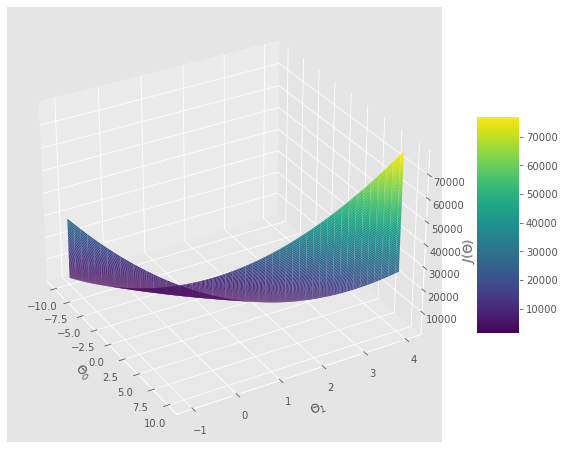

In [34]:
fig= plt.figure(figsize=(12,8))
ax= fig.gca(projection= '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap ='viridis')
fig.colorbar(surf, shrink=0.5,aspect=5)
plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(30,330)
plt.show()

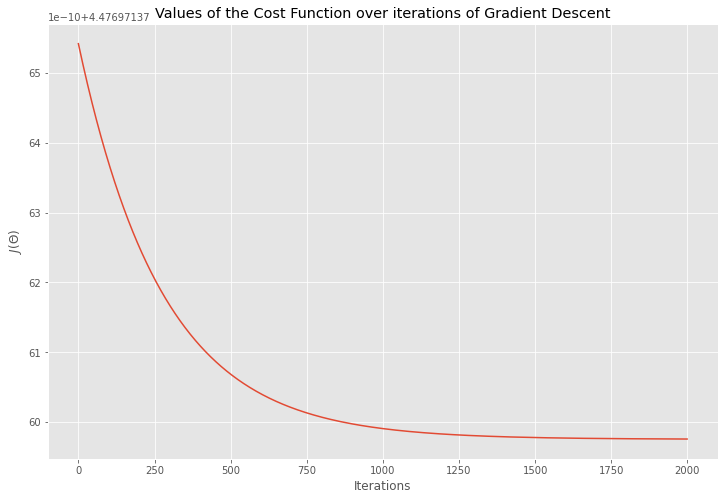

In [35]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost Function over iterations of Gradient Descent");



## Task 8: Training Data with Linear Regression Fit

In [36]:
theta.shape

(2, 1)

In [37]:
theta

array([[-3.89577874],
       [ 1.19303343]])

In [38]:
theta = np.squeeze(theta)

In [42]:
theta

array([-3.89577874,  1.19303343])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


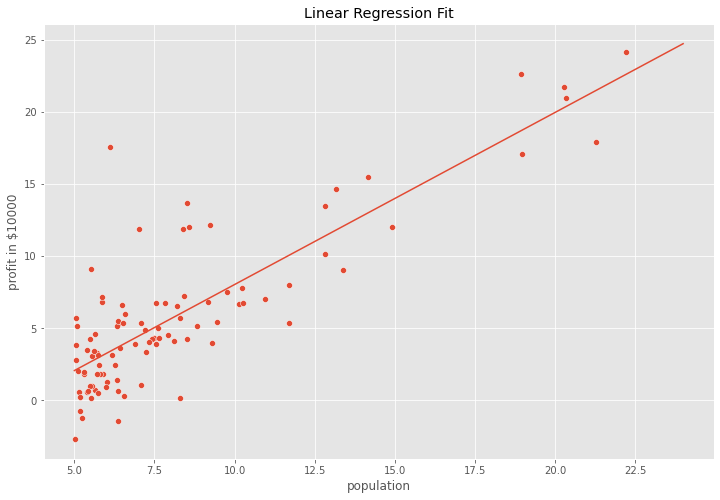

In [43]:
sns.scatterplot(x= "Population", y= "Profit", data= data )

x_value= [ x for x in range(5, 25)]
y_value=[x*theta[1]+ theta[0] for x in x_value]
sns.lineplot(x_value, y_value)
plt.xlabel("population")
plt.ylabel("profit in $10000")
plt.title("Linear Regression Fit");

# Task 9: Inference using the optimized $\theta$ values

$$ h_\theta(x) = \theta^T x $$

In [51]:
def predict (x,theta):
    y_pred = np.dot (theta.transpose(), x)
    return y_pred

In [52]:
y_pred_1 = predict(np.array([1,4]), theta)*10000
print("for a populaton of 40000, people , the model predics a profit of $" + str(round(y_pred_1,0)))

for a populaton of 40000, people , the model predics a profit of $8764.0


In [53]:
y_pred_2 = predict(np.array([1,8.3]), theta)* 10000
print("for a populaton of 83,000, people , the model predics a profit of $" + str(round(y_pred_2,0)))

for a populaton of 83,000, people , the model predics a profit of $60064.0
